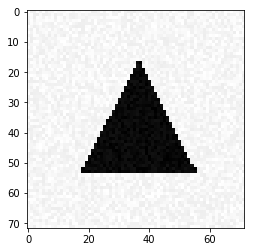

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.callbacks import History 


def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]



In [9]:
def generate_a_drawing_pair(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_free = imdata
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata, imdata_free

def generate_a_rectangle_pair(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_pair(figsize, U, V, noise)


def generate_a_disk_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_pair(figsize, U, V, noise)

def generate_a_triangle_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_pair(figsize, U, V, noise)
    return imdata

def generate_dataset_hourglass(nb_samples, noise=20.0, free_location=False):
    # Getting im_size:
    im = generate_a_rectangle_pair()
    im_size = im[0].shape[0]
    X_noise = np.zeros([nb_samples,im_size])
    X = np.zeros([nb_samples,im_size])

    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X_noise[i], X[i] = generate_a_rectangle_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]
        elif category == 1: 
            X_noise[i], X[i] = generate_a_disk_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]
        else:
            X_noise[i], X[i] = generate_a_triangle_pair(noise, free_location)
            X_noise[i], X[i] = X_noise[i], X[i]

    return np.array([X_noise, X])

# Partie 1 - Simple classification

In [10]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [11]:
X_train[0]

array([0.99682489, 0.94184253, 0.9726701 , ..., 0.98074115, 0.97035338,
       0.98990256])

In [12]:
Y_train = np_utils.to_categorical(Y_train,3)
X_train, Y_train

(array([[0.99682489, 0.94184253, 0.9726701 , ..., 0.98074115, 0.97035338,
         0.98990256],
        [0.99224181, 0.93412815, 0.94236679, ..., 0.99287414, 0.97848583,
         0.94222106],
        [0.93662451, 0.95679845, 0.93865246, ..., 0.97362739, 0.99508707,
         0.93993089],
        ...,
        [0.99671159, 0.93979625, 0.95022827, ..., 0.9337939 , 0.99655038,
         0.95531856],
        [0.99577716, 0.99586048, 0.97787072, ..., 0.98701623, 0.9527382 ,
         0.96300487],
        [0.95578521, 0.93762441, 0.94097372, ..., 0.93271475, 0.96328153,
         0.9998299 ]]), array([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])/255
X_train.shape

(300, 5184)

In [14]:
from keras.models import Sequential 
from keras import utils
model = Sequential()

from keras.layers import Dense, Activation, Flatten

model.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)


model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 1.0923
Epoch 2/100
300/300 [==============================] - 0s 177us/step - loss: 1.0797
Epoch 3/100
300/300 [==============================] - 0s 166us/step - loss: 1.0717
Epoch 4/100
300/300 [==============================] - 0s 179us/step - loss: 1.0660
Epoch 5/100
300/300 [==============================] - 0s 165us/step - loss: 1.0600
Epoch 6/100
300/300 [==============================] - 0s 178us/step - loss: 1.0544
Epoch 7/100
300/300 [==============================] - 0s 165us/step - loss: 1.0480
Epoch 8/100
300/300 [==============================] - 0s 169us/step - loss: 1.0425
Epoch 9/100
300/300 [==============================] - 0s 163us/step - loss: 1.0364
Epoch 10/100
300/300 [==============================] - 0s 164us/step - loss: 1.0303
Epoch 11/100
300/300 [==============================] - 0s 165us/step - loss: 1.0250
Epoch 12/100
300/300 [==============================] - 0s 158us/step - loss

300/300 [==============================] - 0s 169us/step - loss: 0.7080
Epoch 98/100
300/300 [==============================] - 0s 167us/step - loss: 0.7056
Epoch 99/100
300/300 [==============================] - 0s 170us/step - loss: 0.7038
Epoch 100/100
300/300 [==============================] - 0s 159us/step - loss: 0.7014


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])/255
model.predict(X_test)

array([[2.7316311e-32, 5.9105587e-05, 9.9994087e-01]], dtype=float32)

# Partie 2 - Visualization of the solution

In [17]:
weights = model.get_weights()
weightMat = np.asarray(weights[0])

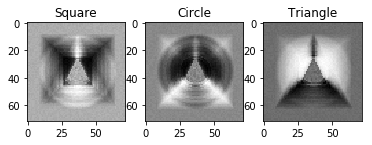

In [18]:
plt.figure();
plt.subplot(1, 3, 1)
plt.imshow(weightMat[:,0].reshape(72,72),cmap='gray')
plt.title('Square')
plt.subplot(1, 3, 2)
plt.imshow(weightMat[:,1].reshape(72,72),cmap='gray')
plt.title('Circle')

plt.subplot(1, 3, 3)
plt.imshow(weightMat[:,2].reshape(72,72), cmap='gray')
plt.title('Triangle')

plt.savefig('figures/part2_features')

plt.show()

# Partie 3 - A More Difficult Classification Problem

In [19]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = utils.np_utils.to_categorical(Y_train,3)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## Classifieur linéaire

In [20]:
from keras.models import Sequential 
from keras import utils
model2 = Sequential()

from keras.layers import Dense, Activation, Flatten

history3 = History()


model2.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model2.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data = (X_test, Y_test), callbacks=[history3])

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 922us/step - loss: 2.2232 - acc: 0.3867 - val_loss: 1.4546 - val_acc: 0.3333
Epoch 2/100
300/300 [==============================] - 0s 278us/step - loss: 1.4541 - acc: 0.3633 - val_loss: 1.2977 - val_acc: 0.3700
Epoch 3/100
300/300 [==============================] - 0s 279us/step - loss: 1.0919 - acc: 0.4933 - val_loss: 1.4106 - val_acc: 0.3967
Epoch 4/100
300/300 [==============================] - 0s 284us/step - loss: 0.9845 - acc: 0.5533 - val_loss: 0.9807 - val_acc: 0.4700
Epoch 5/100
300/300 [==============================] - 0s 269us/step - loss: 1.0027 - acc: 0.5367 - val_loss: 1.3974 - val_acc: 0.5300
Epoch 6/100
300/300 [==============================] - 0s 290us/step - loss: 1.1424 - acc: 0.5633 - val_loss: 1.3324 - val_acc: 0.5567
Epoch 7/100
300/300 [==============================] - 0s 274us/step - loss: 1.1108 - acc: 0.4933 - val_loss: 0.9666 - val_acc: 0.5233
Epoch 8/1

Epoch 61/100
300/300 [==============================] - 0s 270us/step - loss: 0.5710 - acc: 0.7467 - val_loss: 0.9178 - val_acc: 0.5633
Epoch 62/100
300/300 [==============================] - 0s 284us/step - loss: 0.4542 - acc: 0.7933 - val_loss: 0.9070 - val_acc: 0.5767
Epoch 63/100
300/300 [==============================] - 0s 272us/step - loss: 0.4133 - acc: 0.8367 - val_loss: 0.8850 - val_acc: 0.6400
Epoch 64/100
300/300 [==============================] - 0s 265us/step - loss: 0.4155 - acc: 0.8433 - val_loss: 0.8604 - val_acc: 0.6000
Epoch 65/100
300/300 [==============================] - 0s 274us/step - loss: 0.4300 - acc: 0.8300 - val_loss: 0.8728 - val_acc: 0.5767
Epoch 66/100
300/300 [==============================] - 0s 270us/step - loss: 0.4055 - acc: 0.8633 - val_loss: 0.8826 - val_acc: 0.5900
Epoch 67/100
300/300 [==============================] - 0s 268us/step - loss: 0.4058 - acc: 0.8700 - val_loss: 0.9305 - val_acc: 0.5833
Epoch 68/100
300/300 [==========================

In [21]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [22]:
evaluation = model2.evaluate(X_test, Y_test)
evaluation

300/300 [==============================] - 0s 97us/step


[0.9171105623245239, 0.5866666666666667]

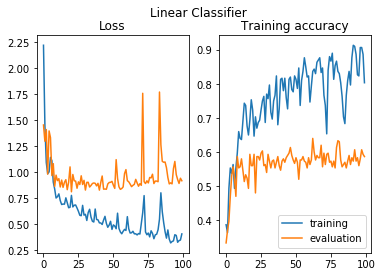

In [23]:
plt.figure(); plt.suptitle('Linear Classifier');
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_linear')
plt.show()

In [24]:
history3.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## CNN

In [25]:
X_train.shape
X_train.reshape(X_train.shape[0],72,72,1)

array([[[[0.96567156],
         [0.99033017],
         [0.96542586],
         ...,
         [0.97730759],
         [0.9334403 ],
         [0.95003971]],

        [[0.95133278],
         [0.93653843],
         [0.94259227],
         ...,
         [0.95498053],
         [0.99027509],
         [0.95722879]],

        [[0.99080338],
         [0.95843994],
         [0.93765111],
         ...,
         [0.99428176],
         [0.99440626],
         [0.98577754]],

        ...,

        [[0.9457771 ],
         [0.97890804],
         [0.96454328],
         ...,
         [0.95577597],
         [0.99258015],
         [0.97778425]],

        [[0.94926014],
         [0.93436041],
         [0.97246454],
         ...,
         [0.98334021],
         [0.97884055],
         [0.93411415]],

        [[0.9531596 ],
         [0.97899591],
         [0.9763891 ],
         ...,
         [0.98959821],
         [0.94372274],
         [0.97646227]]],


       [[[0.93911326],
         [0.98343065],
         [0.93

In [26]:
from keras.models import Sequential 
from keras import utils
model3 = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history = History()

model3.add(Conv2D(16, (5,5), input_shape=(72,72,1)  )    )
model3.add( MaxPooling2D() )
model3.add(Flatten())
model3.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model3.fit(X_train.reshape(X_train.shape[0],72,72,1), Y_train, epochs=100, batch_size=32,  callbacks=[history], validation_data = (X_test.reshape(X_test.shape[0],72,72,1), Y_test),)

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 1.3209 - acc: 0.3767 - val_loss: 1.0629 - val_acc: 0.3667
Epoch 2/100
300/300 [==============================] - 0s 484us/step - loss: 0.9703 - acc: 0.5133 - val_loss: 0.9425 - val_acc: 0.5433
Epoch 3/100
300/300 [==============================] - 0s 484us/step - loss: 0.8354 - acc: 0.6967 - val_loss: 0.9146 - val_acc: 0.5867
Epoch 4/100
300/300 [==============================] - 0s 509us/step - loss: 0.7479 - acc: 0.7367 - val_loss: 0.8588 - val_acc: 0.5300
Epoch 5/100
300/300 [==============================] - 0s 501us/step - loss: 0.7476 - acc: 0.7067 - val_loss: 0.8407 - val_acc: 0.6167
Epoch 6/100
300/300 [==============================] - 0s 501us/step - loss: 0.6322 - acc: 0.8167 - val_loss: 0.7925 - val_acc: 0.6667
Epoch 7/100
300/300 [==============================] - 0s 494us/step - loss: 0.5636 - acc: 0.8567 - val_loss: 0.7766 - val_acc: 0.6733
Epoch 8/100

Epoch 61/100
300/300 [==============================] - 0s 503us/step - loss: 0.0220 - acc: 1.0000 - val_loss: 0.9133 - val_acc: 0.7033
Epoch 62/100
300/300 [==============================] - 0s 487us/step - loss: 0.0214 - acc: 1.0000 - val_loss: 0.9533 - val_acc: 0.6767
Epoch 63/100
300/300 [==============================] - 0s 493us/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.9570 - val_acc: 0.6733
Epoch 64/100
300/300 [==============================] - 0s 493us/step - loss: 0.0211 - acc: 1.0000 - val_loss: 0.9216 - val_acc: 0.6867
Epoch 65/100
300/300 [==============================] - 0s 490us/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.9251 - val_acc: 0.6833
Epoch 66/100
300/300 [==============================] - 0s 487us/step - loss: 0.0185 - acc: 1.0000 - val_loss: 0.9332 - val_acc: 0.6900
Epoch 67/100
300/300 [==============================] - 0s 489us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.9863 - val_acc: 0.6600
Epoch 68/100
300/300 [==========================

In [27]:
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0],72,72,1)
evaluation = model3.evaluate(X_test, Y_test)
evaluation

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 152us/step


[1.09354110399882, 0.686666665871938]

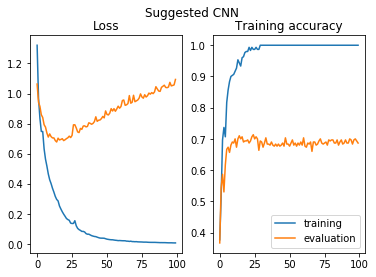

In [28]:
plt.figure(); plt.suptitle('Suggested CNN');
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_cnn')
plt.show()

from keras.utils import plot_model
plot_model(model3, to_file='model_cnn_part3.png')

## Deeper CNN

In [29]:
from keras.models import Sequential 
from keras import utils
model31 = Sequential()

from keras.layers import *
from keras.callbacks import History 
history6 = History()

model31.add(Conv2D(16, (5,5), input_shape=(72,72,1)  )    )
model31.add( MaxPooling2D() )
model31.add(Conv2D(16, (5,5) )    )
model31.add(BatchNormalization())
model31.add(GlobalMaxPooling2D())


model31.add(Dense(16, activation='linear'))
model31.add( Dropout(0.4))
model31.add(Dense(3,activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model31.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])


model31.fit(X_train.reshape(X_train.shape[0],72,72,1), Y_train, epochs=100, batch_size=32,  callbacks=[history6], validation_data = (X_test.reshape(X_test.shape[0],72,72,1), Y_test),)

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 2.4790 - acc: 0.4000 - val_loss: 1.5892 - val_acc: 0.3433
Epoch 2/100
300/300 [==============================] - 0s 659us/step - loss: 1.3591 - acc: 0.5000 - val_loss: 1.2957 - val_acc: 0.3633
Epoch 3/100
300/300 [==============================] - 0s 663us/step - loss: 0.9759 - acc: 0.6067 - val_loss: 0.7989 - val_acc: 0.5367
Epoch 4/100
300/300 [==============================] - 0s 657us/step - loss: 0.8702 - acc: 0.6433 - val_loss: 0.5385 - val_acc: 0.7733
Epoch 5/100
300/300 [==============================] - 0s 659us/step - loss: 0.8159 - acc: 0.6533 - val_loss: 0.7789 - val_acc: 0.5633
Epoch 6/100
300/300 [==============================] - 0s 659us/step - loss: 0.5962 - acc: 0.7267 - val_loss: 0.4792 - val_acc: 0.8067
Epoch 7/100
300/300 [==============================] - 0s 653us/step - loss: 0.4744 - acc: 0.8267 - val_loss: 0.3798 - val_acc: 0.8433
Epoch 8/100

Epoch 61/100
300/300 [==============================] - 0s 641us/step - loss: 0.0208 - acc: 1.0000 - val_loss: 0.0866 - val_acc: 0.9767
Epoch 62/100
300/300 [==============================] - 0s 653us/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.0787 - val_acc: 0.9733
Epoch 63/100
300/300 [==============================] - 0s 658us/step - loss: 0.0197 - acc: 1.0000 - val_loss: 0.0751 - val_acc: 0.9733
Epoch 64/100
300/300 [==============================] - 0s 660us/step - loss: 0.0197 - acc: 0.9967 - val_loss: 0.0906 - val_acc: 0.9767
Epoch 65/100
300/300 [==============================] - 0s 647us/step - loss: 0.0167 - acc: 1.0000 - val_loss: 0.0887 - val_acc: 0.9767
Epoch 66/100
300/300 [==============================] - 0s 652us/step - loss: 0.0241 - acc: 0.9967 - val_loss: 0.0944 - val_acc: 0.9700
Epoch 67/100
300/300 [==============================] - 0s 664us/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9700
Epoch 68/100
300/300 [==========================

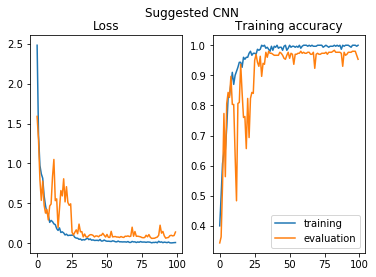

In [30]:
plt.figure(); plt.suptitle('Suggested CNN');
plt.subplot(1, 2, 1)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_deeper_cnn')
plt.show()

from keras.utils import plot_model
plot_model(model3, to_file='figures/model_deeper_part3.png')

# Partie 4 - Regression

In [31]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [32]:
X_train = X_train.reshape(X_train.shape[0],72,72,1)

X_train.shape

(300, 72, 72, 1)

In [33]:
Y_train2 = Y_train
Y_train2

array([[0.752377  , 0.59614323, 0.28966115, 0.03805218, 0.44561834,
        0.07093595],
       [0.77954658, 0.20477579, 0.96449518, 0.26381525, 0.41549123,
        0.54525807],
       [0.67888513, 0.01339769, 0.74781074, 0.30316713, 0.59567673,
        0.35574188],
       ...,
       [0.17499922, 0.23651903, 0.60758353, 0.43116828, 0.53111901,
        0.98841792],
       [0.09830776, 0.82805658, 0.27877555, 0.18049942, 0.24046472,
        0.8640246 ],
       [0.20011454, 0.64946537, 0.27884214, 0.93088681, 0.62683268,
        0.41640373]])

In [34]:
sampling = np.linspace(0,1,72)

def find_nearest(array,value):
    idx = min((np.abs(array-value)).argmin(),71)
    return array[idx]

def pp(Y):
    for i, row in enumerate(Y):
        for j in range(len(row)):
            Y[i,j] = find_nearest(sampling, Y[i,j])
    return Y

Y_train2 = pp(Y_train2)

Y_train2 = Y_train.reshape(Y_train.shape[0], 3,2)
y = Y_train2[0]
for i in range(len(Y_train2)):
    y = Y_train2[i]
    Y_train2[i] = y[y[:,0].argsort()]
Y_train2 = Y_train2.reshape(Y_train.shape[0],6)

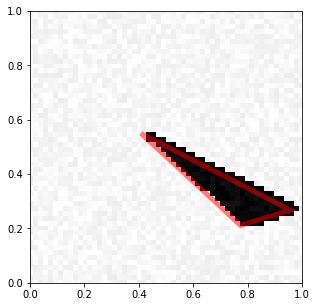

In [35]:
visualize_prediction(X_train[1], Y_train2[1])

In [36]:
from keras.models import Sequential 
from keras import utils
model4 = Sequential()

from keras.layers import *

model4.add(Conv2D(64, (7,7), input_shape=(72,72,1) )  )
model4.add( MaxPooling2D() )

model4.add(Conv2D(256, (5,5) )    )
model4.add(Conv2D(256, (5,5) )    )


model4.add( MaxPooling2D() )
model4.add(Conv2D(256, (5,5)  )    )

model4.add( MaxPooling2D() )

model4.add(Conv2D(1024, (3,3) )    )
model4.add( MaxPooling2D() )

model4.add(BatchNormalization())
#model4.add(GlobalMaxPooling2D())



model4.add(Flatten())
model4.add(Dense(1024 , activation = 'sigmoid'))
model4.add( Dropout(0.5) )

model4.add(Dense(1024 , activation = 'sigmoid'))
model4.add( Dropout(0.5) )


model4.add(Dense(6, activation = 'sigmoid'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(loss='mean_absolute_error', optimizer='adam')


model4.fit(X_train, Y_train2, shuffle = True, epochs=200, batch_size=16)


Epoch 1/1000
300/300 [==============================] - 3s 10ms/step - loss: 0.2317
Epoch 2/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1970
Epoch 3/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1727
Epoch 4/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1630
Epoch 5/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1592
Epoch 6/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1560
Epoch 7/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1362
Epoch 8/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1432
Epoch 9/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1291
Epoch 10/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1291
Epoch 11/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1262
Epoch 12/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.1192


300/300 [==============================] - 1s 5ms/step - loss: 0.0520
Epoch 99/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0537
Epoch 100/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0505
Epoch 101/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0492
Epoch 102/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0531
Epoch 103/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0514
Epoch 104/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0512
Epoch 105/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0516
Epoch 106/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0515
Epoch 107/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0504
Epoch 108/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0501
Epoch 109/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0

300/300 [==============================] - 1s 5ms/step - loss: 0.0398
Epoch 195/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0425
Epoch 196/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0399
Epoch 197/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0421
Epoch 198/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0398
Epoch 199/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0403
Epoch 200/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0397
Epoch 201/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0422
Epoch 202/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0406
Epoch 203/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0416
Epoch 204/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0408
Epoch 205/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.

300/300 [==============================] - 1s 5ms/step - loss: 0.0385
Epoch 291/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0380
Epoch 292/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0372
Epoch 293/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0395
Epoch 294/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0383
Epoch 295/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0373
Epoch 296/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0371
Epoch 297/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0356
Epoch 298/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0366
Epoch 299/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0364
Epoch 300/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0357
Epoch 301/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.

300/300 [==============================] - 1s 5ms/step - loss: 0.0360
Epoch 387/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0355
Epoch 388/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0356
Epoch 389/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0371
Epoch 390/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0348
Epoch 391/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0360
Epoch 392/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0350
Epoch 393/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0350
Epoch 394/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0358
Epoch 395/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0354
Epoch 396/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0334
Epoch 397/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.

300/300 [==============================] - 1s 5ms/step - loss: 0.0330
Epoch 483/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0340
Epoch 484/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0355
Epoch 485/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0346
Epoch 486/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0343
Epoch 487/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0349
Epoch 488/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0345
Epoch 489/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0338
Epoch 490/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0335
Epoch 491/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0341
Epoch 492/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.0340
Epoch 493/1000
300/300 [==============================] - 1s 5ms/step - loss: 0.

KeyboardInterrupt: 

In [37]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 66, 66, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 256)       409856    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 256)       1638656   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         1638656   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
__________

In [38]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [39]:
X_test = X_test.reshape(X_test.shape[0],72,72,1)

In [40]:
Y_test = model4.predict(X_test)
Y_test2 = model4.predict(X_train)
Y_train[0], Y_test2[0]

(array([0.29577465, 0.04225352, 0.45070423, 0.07042254, 0.74647887,
        0.5915493 ]),
 array([0.3177714 , 0.0289459 , 0.47666526, 0.06868465, 0.73801553,
        0.53215957], dtype=float32))

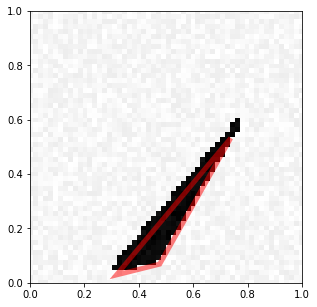

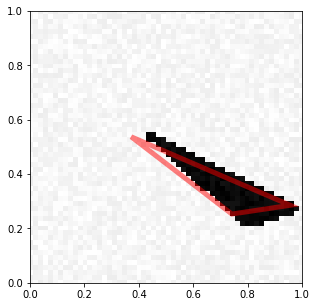

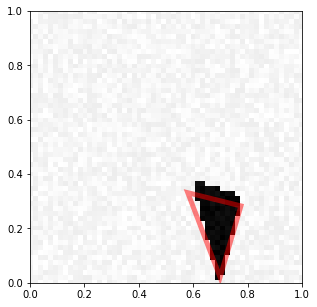

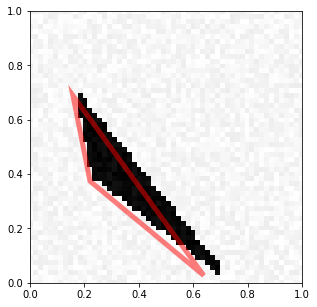

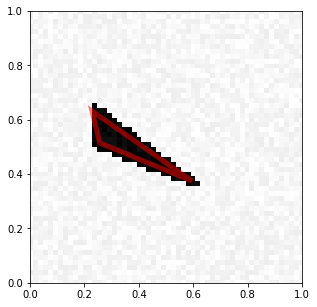

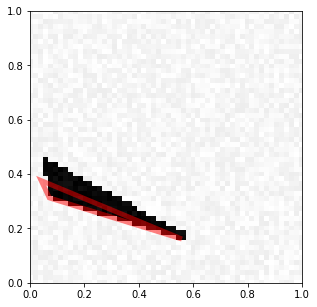

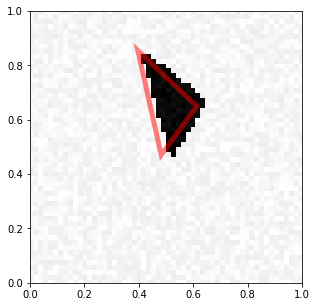

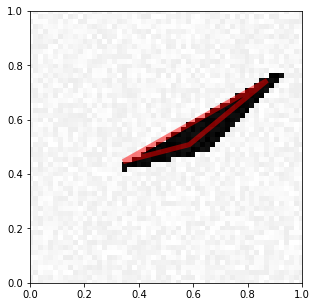

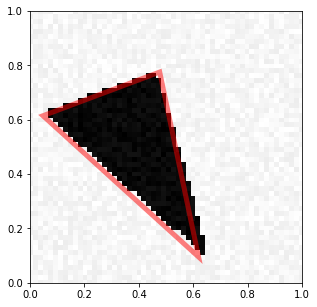

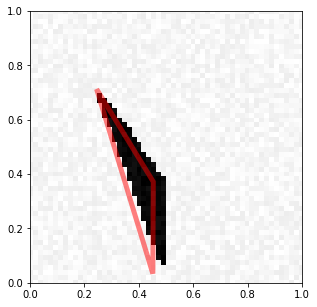

In [42]:
for i in range(10):
    visualize_prediction(X_train[i], (Y_test2[i]))
    plt.savefig('figures/part5_train')


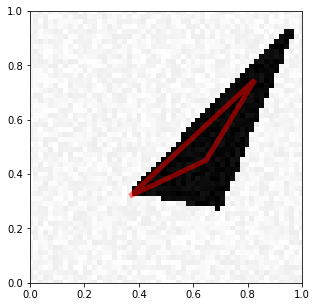

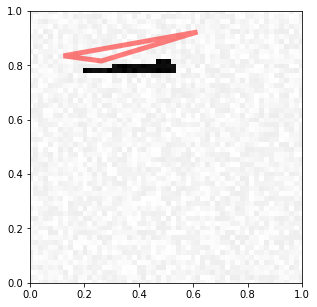

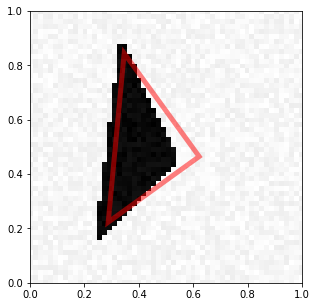

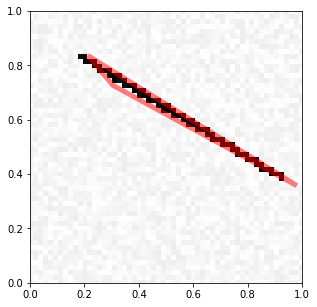

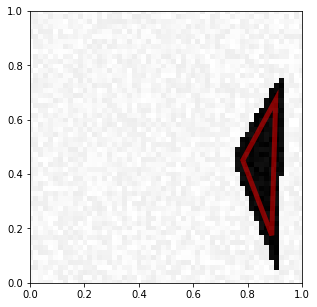

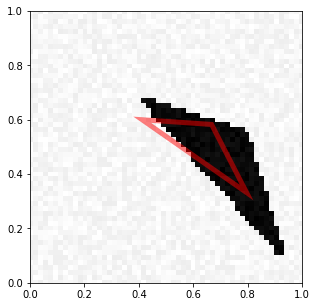

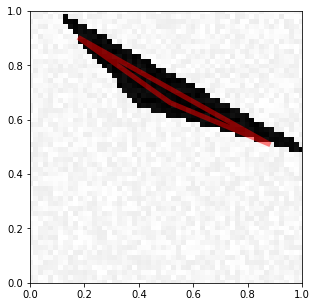

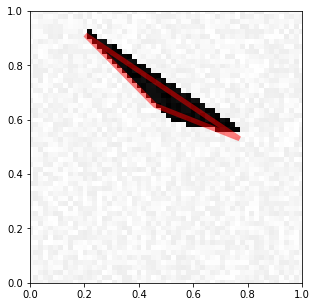

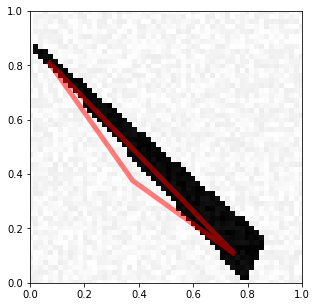

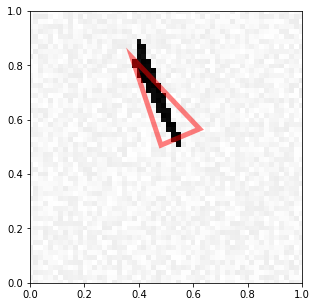

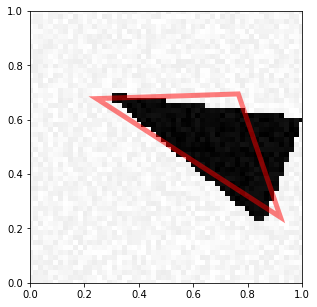

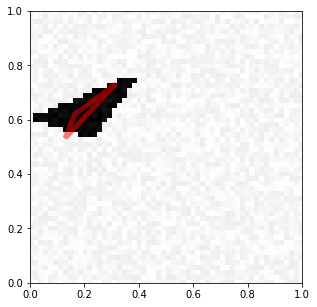

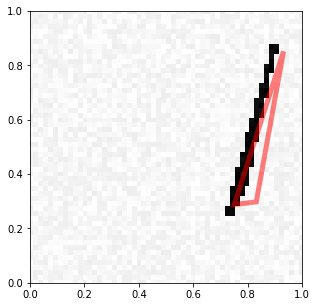

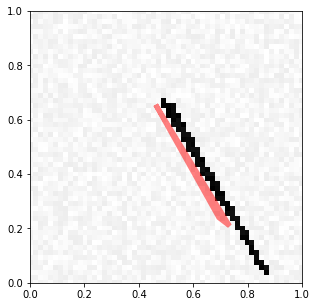

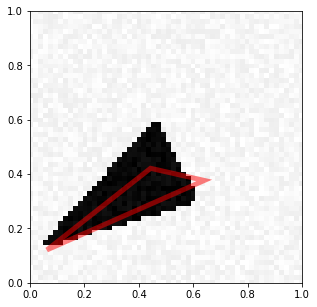

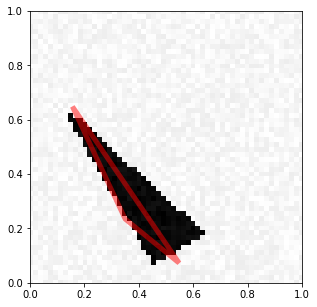

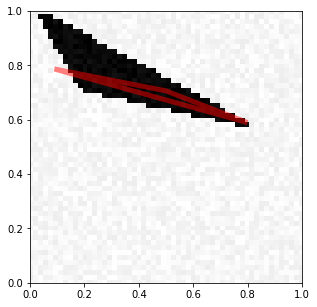

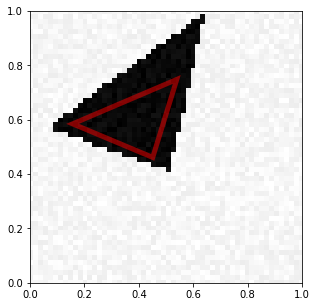

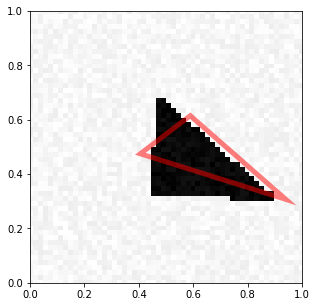

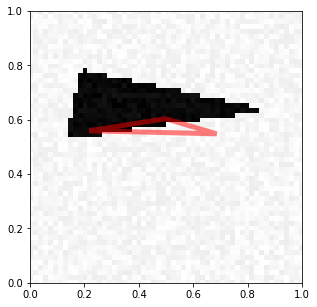

In [43]:
for i in range(20):
    visualize_prediction(X_test[i], (Y_test[i]))
    plt.savefig('figures/part5_test')


In [44]:
Y_test2[0]

array([0.3177714 , 0.0289459 , 0.47666526, 0.06868465, 0.73801553,
       0.53215957], dtype=float32)

In [45]:
Y_train.shape

(300, 6)

In [46]:
Y_test[0]

array([0.3677425 , 0.31910214, 0.647929  , 0.45093852, 0.82681984,
       0.7463566 ], dtype=float32)

In [47]:
Y_train = Y_train.reshape(Y_train.shape[0],3,2)

In [ ]:
np_utils.to_categorical(Y_train[3], 3) 

array([[[1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.]]])

# Bonus question

In [ ]:
XX_train, XX_true = generate_dataset_hourglass(300,100,True)

XX_test, XX_test_true = generate_dataset_hourglass(300,100,True)

Creating data:
0
10


In [ ]:
XX_train = np.clip(XX_train.reshape(XX_train.shape[0],72,72,1)/255,0,1)
XX_true = XX_true.reshape(XX_test.shape[0],72,72,1)/255
XX_test = np.clip(XX_test.reshape(XX_test.shape[0],72,72,1)/255,0,1)
XX_test_true = XX_test.reshape(XX_test_true.shape[0],72,72,1)/255

In [ ]:
autoencoder = Sequential()
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.callbacks import History 
history5 = History()
neurons = 32
autoencoder.add( Conv2D(neurons, (3, 3), input_shape = (72,72,1), activation='relu', padding='same'))
autoencoder.add( MaxPooling2D((2, 2)))
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )

autoencoder.add(MaxPooling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )

autoencoder.add(MaxPooling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( BatchNormalization())

autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add( Conv2D(neurons, (3, 3), activation='relu', padding='same') )
autoencoder.add( UpSampling2D((2, 2)) )
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same') )

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
import tensorflow as tf
# your code here
with tf.device('/gpu:0'):
    autoencoder.fit(XX_train, XX_true,epochs=100,batch_size=128, shuffle = True,callbacks=[history5], validation_data = (XX_test,XX_test_true) ) 

In [ ]:
XX_predict = autoencoder.predict(XX_test)
n = 10
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(XX_train[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
for i in range(1,n):
    ax = plt.subplot(2, n, i)
    plt.imshow(XX_true[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


for i in range(1,n):
    ax = plt.subplot(3, n, i)
    plt.imshow(XX_test[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('figures/part6_test')

plt.show()
    
for i in range(1,n):
    ax = plt.subplot(4, n, i)
    plt.imshow(XX_predict[i].reshape(72, 72))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.savefig('figures/part6_test_predict')

plt.show()

In [ ]:
plt.figure();
plt.plot(history5.history['loss'])
plt.title('Loss')


plt.savefig('figures/part6_cnn')
plt.show()

In [ ]:
autoencoder.summary()

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [ ]:
for i in range(50):
    print(Y_train[i])

In [ ]:
for i in range(20):
    visualize_prediction(X_train[i], (Y_train[i]))

In [ ]:
sampling = np.linspace(0,1,72)

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def pp(Y):
    for i, row in enumerate(Y):
        for j in range(len(row)):
            Y[i,j] = int(find_nearest(sampling, Y[i,j])*72)
    return Y


In [ ]:
sampling = np.linspace(0,1,72)
sampling

In [ ]:
z = Y_train[1]/72

In [ ]:
z

z=z.reshape(3,2)
z

np.sort(z, axis = 1       )

z=z[z[:,0].argsort()].reshape(6)
z